Centroid - nearest mean cluster
Cluster - We will divide dataset into K dinstict cluster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
X = np.array([
    [7.5, 8.0],
    [9.0, 7.0],
    [10.5, 6.5],
    [6.0, 9.0],
    [13.0, 5.5],
    [8.0, 8.5],
    [14.0, 4.5],
    [9.5, 7.0],
    [7.0, 9.0],
    [12.0, 6.0]
])

df = pd.DataFrame(X,columns=(['EntryTime','Duration']))
df

,EntryTime,Duration
0,7.5,8.0
1,9.0,7.0
2,10.5,6.5
3,6.0,9.0
4,13.0,5.5
5,8.0,8.5
6,14.0,4.5
7,9.5,7.0
8,7.0,9.0
9,12.0,6.0


In [4]:
model = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = model.fit_predict(df[['EntryTime','Duration']])
centers = model.cluster_centers_
df

,EntryTime,Duration,Cluster
0,7.5,8.0,0
1,9.0,7.0,2
2,10.5,6.5,2
3,6.0,9.0,0
4,13.0,5.5,1
5,8.0,8.5,0
6,14.0,4.5,1
7,9.5,7.0,2
8,7.0,9.0,0
9,12.0,6.0,1


In [25]:
new_EntryTime = float(input("Enter Entry Time: \n"))
new_duration = float(input("Enter Entry Time: \n"))
new_data = pd.DataFrame([[new_EntryTime,new_duration]], columns=['EntryTime', 'Duration'])
predicted_cluster = model.predict(new_data)

print(f"\nThe new entry ({new_EntryTime}, {new_duration}) belongs to cluster {predicted_cluster[0]}")

Enter Entry Time: 
 8
Enter Entry Time: 
 5



The new entry (8.0, 5.0) belongs to cluster 2


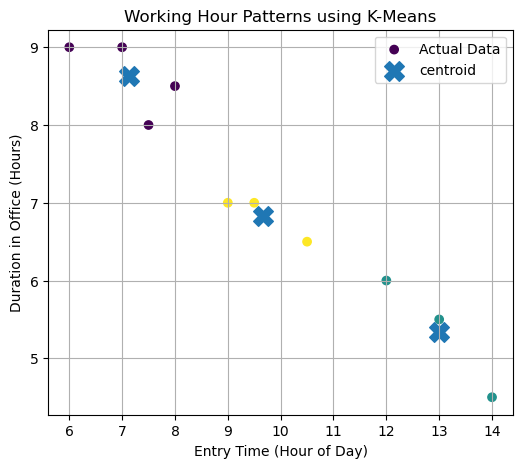

In [29]:
plt.figure(figsize=(6,5))
plt.scatter(df['EntryTime'], df['Duration'], c=df['Cluster'],label='Actual Data')
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, label='centroid') #all rows, column zero
plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration in Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.legend()
plt.grid(True)
plt.show()